In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
from config import weather_api_key


In [5]:
# Build the basic URL for the OpenWeatherMap with my weather_api_key added to the URL# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Create an empty list to hold the weather data.
city_data= []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1


    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Processing Record 1 of Set 13 | amderma
City not found. Skipping...
Processing Record 2 of Set 13 | la ronge
Processing Record 3 of Set 13 | hailar
Processing Record 4 of Set 13 | clyde river
Processing Record 5 of Set 13 | bredasdorp
Processing Record 6 of Set 13 | mount gambier
Processing Record 7 of Set 13 | castro
Processing Record 8 of Set 13 | mataura
Processing Record 9 of Set 13 | cabo san lucas
Processing Record 10 of Set 13 | hithadhoo
Processing Record 11 of Set 13 | cape town
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | smithers
Processing Record 14 of Set 13 | iqaluit
Processing Record 15 of Set 13 | juifang
City not found. Skipping...
Processing Record 16 of Set 13 | avarua
Processing Record 17 of Set 13 | nanortalik
Processing Record 18 of Set 13 | severo-kurilsk
Processing Record 19 of Set 13 | atuona
Processing Record 20 of Set 13 | kaoma
Processing Record 21 of Set 13 | arraial do cabo
Processing Record 22 of Set 13 | mar del plata
Process

Processing Record 33 of Set 16 | tuktoyaktuk
Processing Record 34 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 35 of Set 16 | lensk
Processing Record 36 of Set 16 | biltine
Processing Record 37 of Set 16 | kropotkin
Processing Record 38 of Set 16 | krasnyy yar
Processing Record 39 of Set 16 | sioux lookout
Processing Record 40 of Set 16 | conceicao do castelo
Processing Record 41 of Set 16 | porto novo
Processing Record 42 of Set 16 | richards bay
Processing Record 43 of Set 16 | igarka
Processing Record 44 of Set 16 | mahebourg
Processing Record 45 of Set 16 | buchanan
Processing Record 46 of Set 16 | dargaville
Processing Record 47 of Set 16 | upington
Processing Record 48 of Set 16 | palana
Processing Record 49 of Set 16 | caravelas
Processing Record 50 of Set 16 | naze
Processing Record 1 of Set 17 | yellowknife
Processing Record 2 of Set 17 | surt
Processing Record 3 of Set 17 | halalo
City not found. Skipping...
Processing Record 4 of Set 17 | lebu
P

Processing Record 16 of Set 20 | concepcion
Processing Record 17 of Set 20 | viedma
Processing Record 18 of Set 20 | alotau
City not found. Skipping...
Processing Record 19 of Set 20 | jinchengjiang
City not found. Skipping...
Processing Record 20 of Set 20 | carbonia
Processing Record 21 of Set 20 | calama
Processing Record 22 of Set 20 | angoche
Processing Record 23 of Set 20 | provideniya
Processing Record 24 of Set 20 | haikou
Processing Record 25 of Set 20 | castelo do piaui
Processing Record 26 of Set 20 | yantal
Processing Record 27 of Set 20 | norman wells
Processing Record 28 of Set 20 | anaconda
Processing Record 29 of Set 20 | yulara
Processing Record 30 of Set 20 | bitung
Processing Record 31 of Set 20 | karasjok
Processing Record 32 of Set 20 | amazar
Processing Record 33 of Set 20 | fare
Processing Record 34 of Set 20 | vaxjo
Processing Record 35 of Set 20 | tautira
Processing Record 36 of Set 20 | pipri
Processing Record 37 of Set 20 | oxbow
Processing Record 38 of Set 2

Processing Record 3 of Set 24 | nemuro
Processing Record 4 of Set 24 | lahaina
Processing Record 5 of Set 24 | buin
Processing Record 6 of Set 24 | disna
Processing Record 7 of Set 24 | opuwo
Processing Record 8 of Set 24 | ahipara
Processing Record 9 of Set 24 | tricase
Processing Record 10 of Set 24 | price
Processing Record 11 of Set 24 | banda aceh
Processing Record 12 of Set 24 | walvis bay
Processing Record 13 of Set 24 | bucerias
Processing Record 14 of Set 24 | akyab
Processing Record 15 of Set 24 | tongzi
Processing Record 16 of Set 24 | mocambique
City not found. Skipping...
Processing Record 17 of Set 24 | malindi
Processing Record 18 of Set 24 | gabi
Processing Record 19 of Set 24 | katsuura
Processing Record 20 of Set 24 | montauban
Processing Record 21 of Set 24 | noyabrsk
Processing Record 22 of Set 24 | ulaangom
Processing Record 23 of Set 24 | khromtau
Processing Record 24 of Set 24 | coquimbo
Processing Record 25 of Set 24 | nelson bay
Processing Record 26 of Set 24 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Ronge,55.1001,-105.2842,35.82,86,100,5.75,CA,2022-04-30 16:16:20
1,Hailar,49.2000,119.7000,34.09,39,11,6.15,CN,2022-04-30 16:16:21
2,Clyde River,70.4692,-68.5914,16.03,79,100,3.44,CA,2022-04-30 16:16:21
3,Bredasdorp,-34.5322,20.0403,61.00,65,17,7.94,ZA,2022-04-30 16:16:21
4,Mount Gambier,-37.8333,140.7667,53.51,94,40,11.50,AU,2022-04-30 16:16:22
5,Castro,-24.7911,-50.0119,64.47,79,97,6.96,BR,2022-04-30 16:12:45
6,Mataura,-46.1927,168.8643,63.48,86,84,4.25,NZ,2022-04-30 16:16:22
7,Cabo San Lucas,22.8909,-109.9124,81.61,52,0,4.61,MX,2022-04-30 16:13:12
8,Hithadhoo,-0.6000,73.0833,85.80,68,72,15.37,MV,2022-04-30 16:16:23
9,Cape Town,-33.9258,18.4232,64.35,68,0,10.36,ZA,2022-04-30 16:16:23


In [11]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Ronge,CA,2022-04-30 16:16:20,55.1001,-105.2842,35.82,86,100,5.75
1,Hailar,CN,2022-04-30 16:16:21,49.2000,119.7000,34.09,39,11,6.15
2,Clyde River,CA,2022-04-30 16:16:21,70.4692,-68.5914,16.03,79,100,3.44
3,Bredasdorp,ZA,2022-04-30 16:16:21,-34.5322,20.0403,61.00,65,17,7.94
4,Mount Gambier,AU,2022-04-30 16:16:22,-37.8333,140.7667,53.51,94,40,11.50
5,Castro,BR,2022-04-30 16:12:45,-24.7911,-50.0119,64.47,79,97,6.96
6,Mataura,NZ,2022-04-30 16:16:22,-46.1927,168.8643,63.48,86,84,4.25
7,Cabo San Lucas,MX,2022-04-30 16:13:12,22.8909,-109.9124,81.61,52,0,4.61
8,Hithadhoo,MV,2022-04-30 16:16:23,-0.6000,73.0833,85.80,68,72,15.37
9,Cape Town,ZA,2022-04-30 16:16:23,-33.9258,18.4232,64.35,68,0,10.36


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

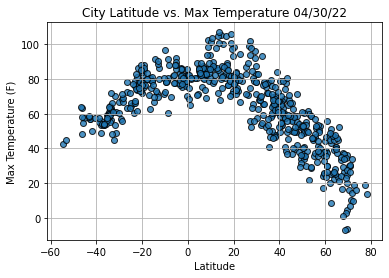

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

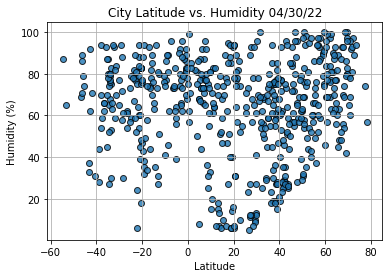

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

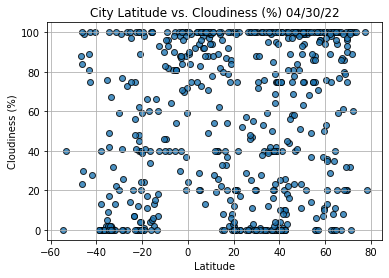

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

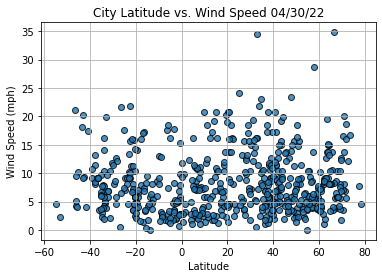

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
#Create the Hemisphere DataFrames.
index13=city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2022-04-30 16:16:25
Lat                      -21.2078
Lng                      -159.775
Max Temp                    77.05
Humidity                       88
Cloudiness                     40
Wind Speed                   6.91
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0       True
1       True
2       True
3      False
4      False
       ...  
560    False
561     True
562     True
563     True
564    False
Name: Lat, Length: 565, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Ronge,CA,2022-04-30 16:16:20,55.1001,-105.2842,35.82,86,100,5.75
1,Hailar,CN,2022-04-30 16:16:21,49.2000,119.7000,34.09,39,11,6.15
2,Clyde River,CA,2022-04-30 16:16:21,70.4692,-68.5914,16.03,79,100,3.44
7,Cabo San Lucas,MX,2022-04-30 16:13:12,22.8909,-109.9124,81.61,52,0,4.61
11,Smithers,CA,2022-04-30 16:16:24,54.7804,-127.1743,44.92,57,75,3.44


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

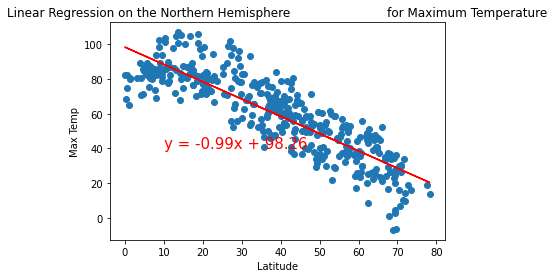

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

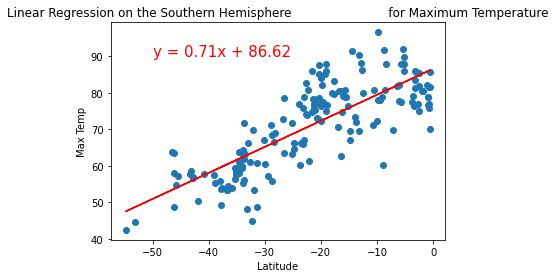

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

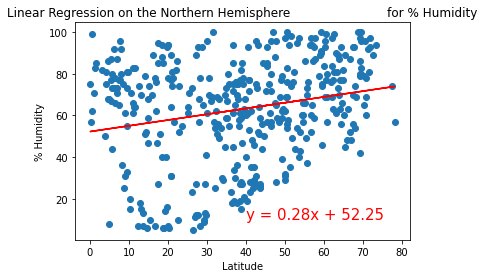

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

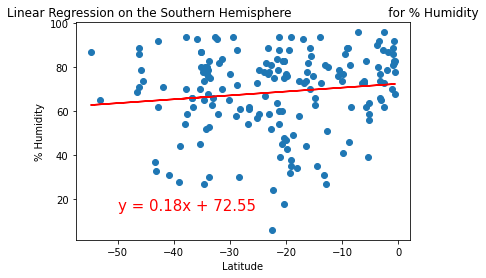

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

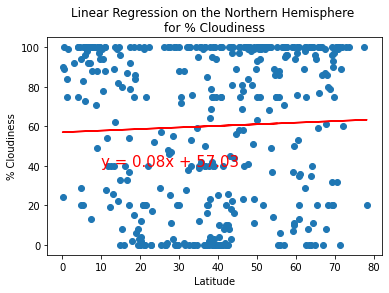

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

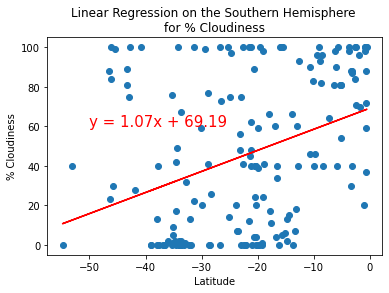

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

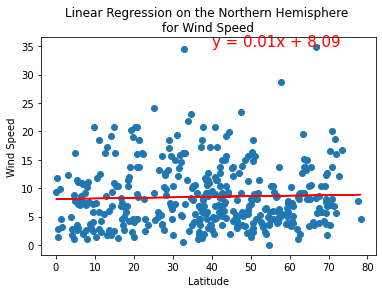

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

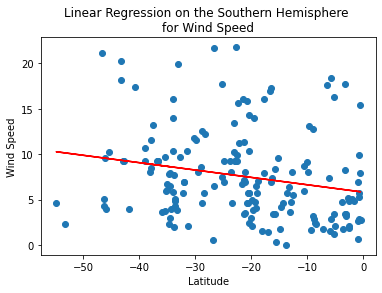

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))